# **Image Compression using SVD (from `rice_ml` Package)**

## Algorithm Description

I use the mathematical formulation of SVD to decompose a 2D grayscale image matrix `M` into three components:

M = U · Σ · Vᵗ


- `U`: An orthogonal matrix containing the left singular vectors.
- `Σ`: A diagonal matrix of singular values (in descending order).
- `Vᵗ`: An orthogonal matrix containing the right singular vectors.

By retaining only the top \( k \) singular values and their corresponding vectors (a rank-\( k \) approximation), I reconstruct a compressed version of the image. This method enables a trade-off between compression and image quality.

## SVD Process Illustration

The figure below illustrates the geometric interpretation of Singular Value Decomposition (SVD). Any linear transformation matrix `M` can be decomposed into:

1. A **rotation** via the matrix `Vᵗ` (right singular vectors)
2. A **scaling** along orthogonal axes via the diagonal matrix `Σ` (singular values)
3. Another **rotation** via the matrix `U` (left singular vectors)

This means the transformation `M` is equivalent to rotating a vector space, stretching it along new orthogonal directions, and then rotating again.

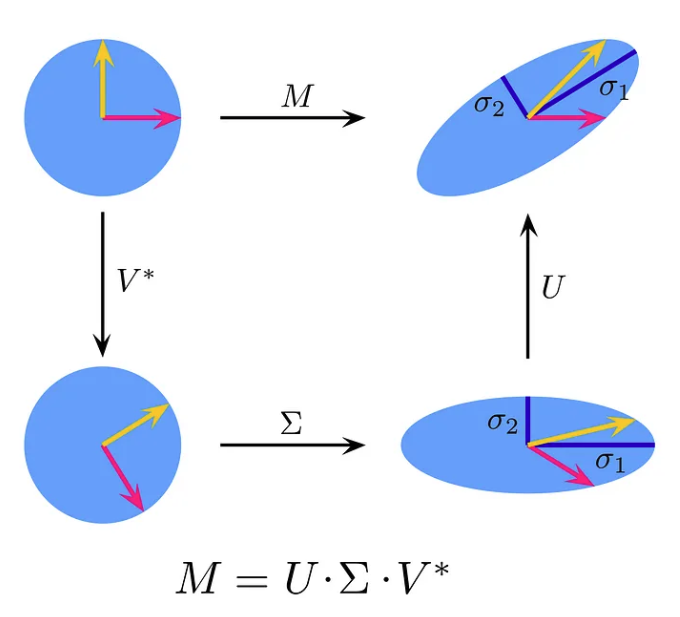

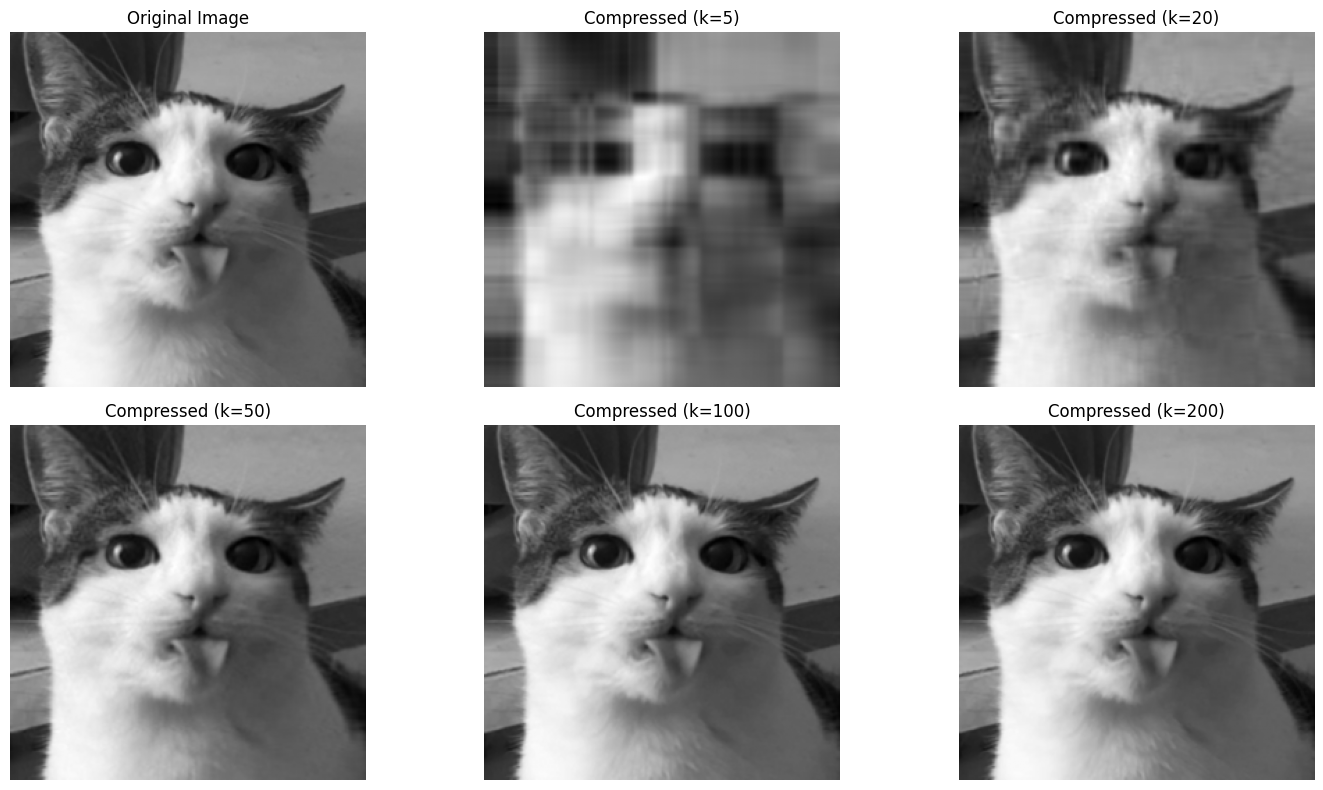

In [2]:
# Image Compression using SVD for RGBA image
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.transform import resize

# Step 1: Load the RGBA image and drop alpha channel
img_path = "/content/drive/MyDrive/Colab Notebooks/ML_Rice_2025_Final_Project/cat.jpg"
img = io.imread(img_path)

# Drop the alpha channel if present
if img.shape[2] == 4:
    img = img[:, :, :3]  # Retain only R, G, B channels

# Convert to grayscale
img_gray = color.rgb2gray(img)

# Resize for computational efficiency
img_resized = resize(img_gray, (256, 256), anti_aliasing=True)

# Step 2: SVD Compression Function
def compress_svd(image, k):
    U, S, Vt = np.linalg.svd(image, full_matrices=False)
    S_k = np.diag(S[:k])
    U_k = U[:, :k]
    Vt_k = Vt[:k, :]
    return np.dot(U_k, np.dot(S_k, Vt_k))

# Step 3: Visualization
k_values = [5, 20, 50, 100, 200]

plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 1)
plt.imshow(img_resized, cmap='gray')
plt.title("Original Image")
plt.axis('off')

for i, k in enumerate(k_values):
    compressed_img = compress_svd(img_resized, k)
    plt.subplot(2, 3, i + 2)
    plt.imshow(compressed_img, cmap='gray')
    plt.title(f"Compressed (k={k})")
    plt.axis('off')

plt.tight_layout()
plt.show()


### Image Compression using SVD – Interpretation

In the figure above, we observe the results of applying Singular Value Decomposition (SVD) for image compression at various levels of retained singular values, denoted by \(k\). The image was compressed with different values of \(k\) to illustrate the trade-off between compression and image quality.

#### 1. **Original Image**
The first image is the original uncompressed image. It contains all the detailed information, including the texture and finer features, with no loss in visual quality.

#### 2. **Compressed (k=5)**
With only the top 5 singular values, the compression results in a very blurry and indistinct image. Most of the fine details are lost, and the overall structure is hard to identify. This shows the limitation of using a very small number of singular values, where only the most dominant patterns are retained, leading to a significant loss in information.

#### 3. **Compressed (k=20)**
As \(k\) increases to 20, the image begins to show clearer details. However, it still appears somewhat abstract and fuzzy, especially around the edges. The image is better than with \(k=5\), but it's evident that a substantial amount of fine detail is still missing.

#### 4. **Compressed (k=50)**
With 50 singular values, the image becomes much clearer. Key features such as the cat's eyes, nose, and the overall shape are more recognizable. This level of compression strikes a balance between retaining the essential features of the image and achieving a reduction in data size.

#### 5. **Compressed (k=100)**
At \(k=100\), the image shows a much better representation of the original, with fewer visible artifacts and more defined shapes. The cat's features are now almost as clear as in the original image, demonstrating that more singular values are needed to closely match the original.

#### 6. **Compressed (k=200)**
Finally, with \(k=200\), the image is nearly identical to the original. At this point, most of the details have been retained, and the image quality is almost as good as the uncompressed version. This indicates that the majority of the significant information in the image is captured with these 200 singular values.

### Conclusion
The results clearly demonstrate that **the higher the value of \(k\), the better the image quality** after compression. However, there's a diminishing return in quality as \(k\) increases beyond a certain point. For practical use, choosing an appropriate value of \(k\) allows a good balance between data compression and visual fidelity.